In [ ]:
'''
This file plots CMIP5 RCP - HIST over South Australia
/Users/earl/Desktop/Yang
and places the outputs in
/Users/earl/Dropbox/CMIP5/figures

Earl Duran 
created: 19-Mar-18
e.duran@unsw.edu.au
'''

import os
import xarray as xr
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import sys
import pickle
def find_nearest_index(array, value):
    return int((np.abs(array - value)).argmin())



In [2]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [3]:
os.system('sshfs \
erd561@raijin.nci.org.au:/g/data/e14/erd561/CMIP5/bromeliad/ \
/Users/earl/Desktop/bamboo')

os.system('sshfs \
erd561@raijin.nci.org.au:/g/data/e14/erd561/CMIP5/camelia/ \
/Users/earl/Desktop/cyclamen')

256

In [4]:
script_name = nb_name[:-6]
print(script_name)
figures_path = '/Users/earl/Dropbox/CMIP5/figures/'

hist_thetao_path = '/Users/earl/Desktop/cyclamen/historical/mon/ocean/thetao/latest/'
hist_tauuo_path = '/Users/earl/Desktop/bamboo/historical/mon/ocean/tauuo/latest/'
hist_uas_path = '/Users/earl/Desktop/bamboo/historical/mon/atmos/uas/latest/'
hist_vas_path = '/Users/earl/Desktop/bamboo/historical/mon/atmos/vas/latest/'
hist_thetao_list = sorted(os.listdir(hist_thetao_path))
hist_tauuo_list = sorted(os.listdir(hist_tauuo_path))
hist_uas_list = sorted(os.listdir(hist_uas_path))
hist_vas_list = sorted(os.listdir(hist_vas_path))

rcp85_thetao_path = '/Users/earl/Desktop/cyclamen/rcp85/mon/ocean/thetao/latest/'
rcp85_tauuo_path = '/Users/earl/Desktop/bamboo/rcp85/mon/ocean/tauuo/latest/'
rcp85_uas_path = '/Users/earl/Desktop/bamboo/rcp85/mon/atmos/uas/latest/'
rcp85_vas_path = '/Users/earl/Desktop/bamboo/rcp85/mon/atmos/vas/latest/'
rcp85_thetao_list = sorted(os.listdir(rcp85_thetao_path))
rcp85_tauuo_list = sorted(os.listdir(rcp85_tauuo_path))
rcp85_uas_list = sorted(os.listdir(rcp85_uas_path))
rcp85_vas_list = sorted(os.listdir(rcp85_vas_path))

good_list = []
thetao_hist_good_list = []
for hist_thetao in hist_thetao_list:
    if \
    any(hist_thetao[:-28] in hist_tauuo for hist_tauuo in hist_tauuo_list) and \
    any(hist_thetao[:-28] in hist_uas for hist_uas in hist_uas_list) and \
    any(hist_thetao[:-28] in hist_vas for hist_vas in hist_vas_list) and \
    any(hist_thetao[:-28] in rcp85_thetao for rcp85_thetao in rcp85_thetao_list) and \
    any(hist_thetao[:-28] in rcp85_tauuo for rcp85_tauuo in rcp85_tauuo_list) and \
    any(hist_thetao[:-28] in rcp85_uas for rcp85_uas in rcp85_uas_list) and \
    any(hist_thetao[:-28] in rcp85_vas for rcp85_vas in rcp85_vas_list):
        print(hist_thetao[:-29])
        thetao_hist_good_list.append(hist_thetao)
        good_list.append(hist_thetao[:-29])

tauuo_hist_good_list = []
thetao_rcp85_good_list = []
tauuo_rcp85_good_list = []
for good in good_list:
    tauuo_hist_good_list.append([
        hist_tauuo for hist_tauuo in hist_tauuo_list if hist_tauuo[:-23] in good + '_'][0])
    thetao_rcp85_good_list.append(
        [rcp85_thetao for rcp85_thetao in rcp85_thetao_list if rcp85_thetao[:-28] in good + '_'][0])
    tauuo_rcp85_good_list.append(
        [rcp85_tauuo for rcp85_tauuo in rcp85_tauuo_list if rcp85_tauuo[:-23] in good + '_'][0])
print(tauuo_hist_good_list)
#print(thetao_rcp85_good_list)
#print(tauuo_rcp85_good_list)



p05_plot_anomaly_maps
ACCESS1-0
ACCESS1-3
CMCC-CMS
CMCC-CM
CNRM-CM5
CSIRO-Mk3-6-0
CanESM2
FGOALS-s2
GFDL-CM3
GFDL-ESM2G
GFDL-ESM2M
HadGEM2-AO
IPSL-CM5A-LR
IPSL-CM5A-MR
IPSL-CM5B-LR
MIROC-ESM-CHEM
MIROC-ESM
MIROC5
MPI-ESM-LR
MPI-ESM-MR
MRI-CGCM3
MRI-ESM1
NorESM1-M
inmcm4
['ACCESS1-0_r1i1p1_1980-1999mean.nc', 'ACCESS1-3_r1i1p1_1980-1999mean.nc', 'CMCC-CMS_r1i1p1_1980-1999mean.nc', 'CMCC-CM_r1i1p1_1980-1999mean.nc', 'CNRM-CM5_r1i1p1_1980-1999mean.nc', 'CSIRO-Mk3-6-0_r1i1p1_1980-1999mean.nc', 'CanESM2_r1i1p1_1980-1999mean.nc', 'FGOALS-s2_r1i1p1_1980-1999mean.nc', 'GFDL-CM3_r1i1p1_1980-1999mean.nc', 'GFDL-ESM2G_r1i1p1_1980-1999mean.nc', 'GFDL-ESM2M_r1i1p1_1980-1999mean.nc', 'HadGEM2-AO_r1i1p1_1980-1999mean.nc', 'IPSL-CM5A-LR_r1i1p1_1980-1999mean.nc', 'IPSL-CM5A-MR_r1i1p1_1980-1999mean.nc', 'IPSL-CM5B-LR_r1i1p1_1980-1999mean.nc', 'MIROC-ESM-CHEM_r1i1p1_1980-1999mean.nc', 'MIROC-ESM_r1i1p1_1980-1999mean.nc', 'MIROC5_r1i1p1_1980-1999mean.nc', 'MPI-ESM-LR_r1i1p1_1980-1999mean.nc', 'MPI-ESM-MR_r

In [42]:
thetao_hist = {}
thetao_rcp85 = {}
thetao_anom = {}
thetao_lat = {}
thetao_lon = {}

tauuo_hist = {}
tauuo_rcp85 = {}
tauuo_anom = {}
tauuo_lat = {}
tauuo_lon = {}

plot_list = []
for (model_thetao_hist, model_tauuo_hist, model_thetao_rcp85, model_tauuo_rcp85, model) \
in zip(thetao_hist_good_list, tauuo_hist_good_list, 
       thetao_rcp85_good_list, tauuo_rcp85_good_list, 
       good_list):
    print(model + '...')
    
    # These models are hard to deal with:
    # MIROC5 and inmcm4 have a crazy rotated grid
    # MPI-ESM-LR has a weird grid too
    # if model in ['MIROC5', 'MPI-ESM-LR', 'inmcm4', 'FIO-ESM', 'CESM1-WACCM']:
    if model in ['MIROC5', 'inmcm4', 'MPI-ESM-LR']:
        print('No.')
        continue
    
    plot_list.append(model)
    
    thetao_hist_data = xr.open_dataset(hist_thetao_path + model_thetao_hist, decode_times=False)
    thetao_rcp85_data = xr.open_dataset(rcp85_thetao_path + model_thetao_rcp85, decode_times=False)
    thetao_hist[model] = thetao_hist_data['thetao'][0,0,:,:]
    thetao_rcp85[model] = thetao_rcp85_data['thetao'][0,0,:,:]
    
    tauuo_hist_data = xr.open_dataset(hist_tauuo_path + model_tauuo_hist, decode_times=False)
    tauuo_rcp85_data = xr.open_dataset(rcp85_tauuo_path + model_tauuo_rcp85, decode_times=False)
    tauuo_hist[model] = tauuo_hist_data['tauuo'][0,:,:]
    tauuo_rcp85[model] = tauuo_rcp85_data['tauuo'][0,:,:]
    
    thetao_anom[model] = thetao_rcp85[model]-thetao_hist[model]
    tauuo_anom[model] = tauuo_rcp85[model]-tauuo_hist[model]
    
    if len(thetao_hist_data['lat'].shape) is 2:
        # MPI-ESM-LR and MPI-ESM-MR longitude index should be taken from the end
        if model in ['MPI-ESM-LR', 'MPI-ESM-MR']:
            thetao_lat[model] = thetao_hist_data['lat'][:,0]
            thetao_lon[model] = thetao_hist_data['lon'][-1,:]
        else:
            thetao_lat[model] = thetao_hist_data['lat'][:,0]
            thetao_lon[model] = thetao_hist_data['lon'][0,:]
    else:
        thetao_lat[model] = thetao_hist_data['lat'][:]
        thetao_lon[model] = thetao_hist_data['lon'][:]
    
    if len(tauuo_hist_data['lat'].shape) is 2:
        # MPI-ESM-LR and MPI-ESM-MR longitude index should be taken from the end
        if model in ['MPI-ESM-LR', 'MPI-ESM-MR']:
            tauuo_lat[model] = tauuo_hist_data['lat'][:,0]
            tauuo_lon[model] = tauuo_hist_data['lon'][-1,:]
        else:
            tauuo_lat[model] = tauuo_hist_data['lat'][:,0]
            tauuo_lon[model] = tauuo_hist_data['lon'][0,:]
    else:
        tauuo_lat[model] = tauuo_hist_data['lat'][:]
        tauuo_lon[model] = tauuo_hist_data['lon'][:]
    
    # The GFDL models run need this lon offset fix ...
    if model in ['GFDL-CM3', 'GFDL-ESM2G', 'GFDL-ESM2M', 'bcc-csm1-1-m', 'bcc-csm1-1']:
        thetao_lon[model][0:100] += 360
        tauuo_lon[model][0:100] += 360
    
#     # MPI-ESM-LR lon needs to be offset...
#     if model in ['MPI-ESM-LR']:
#         thetao_lon[model].roll(lon=100)
#         tauuo_lon[model].roll(i=100)
    
    # Also, MPI-ESM-LR and MPI-ESM-MR are flipped upside down...
    # Couldn't find a flip function in xarray...
    if model in ['MPI-ESM-LR', 'MPI-ESM-MR']:
        thetao_anom_now = thetao_anom[model]
        thetao_anom[model] = np.flipud(thetao_anom_now)
        tauuo_anom_now = tauuo_anom[model]
        tauuo_anom[model] = np.flipud(tauuo_anom_now)
        
        thetao_lat_now = thetao_lat[model]
        thetao_lat[model] = np.flipud(thetao_lat_now)
        tauuo_lat_now = tauuo_lat[model]
        tauuo_lat[model] = np.flipud(tauuo_lat_now)
        
    # HadGEM2-AO, MRI-CGCM3 and MRI-ESM1 need to have their wind stress land masked...
    if model in ['HadGEM2-AO', 'MRI-CGCM3', 'MRI-ESM1', 'EC-EARTH']:
        # anything that satisfies the condition is SAFE
        tauuo_anom[model] = tauuo_anom[model].where((tauuo_anom[model] != 0), np.nan)
    
    # MRI-CGCM3 and MRI-ESM1 need to have their SST land masked...
    if model in ['MRI-CGCM3', 'MRI-ESM1', 'EC-EARTH']:
        thetao_anom[model] = thetao_anom[model].where((thetao_anom[model] != 0), np.nan)
        
    print('OK!')
        
print(len(plot_list))   
        

ACCESS1-0...
OK!
ACCESS1-3...
OK!
CMCC-CMS...
OK!
CMCC-CM...
OK!
CNRM-CM5...
OK!
CSIRO-Mk3-6-0...
OK!
CanESM2...
OK!
FGOALS-s2...
OK!
GFDL-CM3...
OK!
GFDL-ESM2G...
OK!
GFDL-ESM2M...
OK!
HadGEM2-AO...
OK!
IPSL-CM5A-LR...
OK!
IPSL-CM5A-MR...
OK!
IPSL-CM5B-LR...
OK!
MIROC-ESM-CHEM...
OK!
MIROC-ESM...
OK!
MIROC5...
No.
MPI-ESM-LR...
No.
MPI-ESM-MR...
OK!
MRI-CGCM3...
OK!
MRI-ESM1...
OK!
NorESM1-M...
OK!
inmcm4...
No.
21


KeyError: 'MPI-ESM-LR'

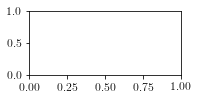

In [43]:
model_check = 'MPI-ESM-LR'

#thetao_anom[model_check] = thetao_anom[model_check].where((thetao_anom[model_check] != 0), np.nan)

plt.subplot(3,2,1)
plt.contourf(thetao_anom[model_check])
plt.subplot(3,2,2)
plt.contourf(tauuo_anom[model_check])
plt.subplot(3,2,3)
plt.plot(thetao_lon[model_check])
plt.subplot(3,2,4)
plt.plot(tauuo_lon[model_check])
plt.subplot(3,2,5)
plt.plot(thetao_lat[model_check])
plt.subplot(3,2,6)
plt.plot(tauuo_lat[model_check])

In [44]:
# SAM index:
lat_neg = -36
lat_pos = -55
lon_negW = 100
lon_negE = 140
SAM_neg = []
SAM_pos = []
SAM_index = []

# Warming pool area:
lat_warmN = -31
lat_warmS = -41
lon_warmW = 112
lon_warmE = 145
warm_pool = {}

wind_pool = {}

for idx, t in enumerate(plot_list):
    print(t)
    
    lat_neg_idx = find_nearest_index(tauuo_lat[t], lat_neg)
    lat_pos_idx = find_nearest_index(tauuo_lat[t], lat_pos)
    lon_negW_idx = find_nearest_index(tauuo_lon[t], lon_negW)
    lon_negE_idx = find_nearest_index(tauuo_lon[t], lon_negE)
    print(tauuo_lat[t])
    print(tauuo_lon[t])
    
    SAM_neg.append(np.nanmean(tauuo_anom[t][lat_neg_idx,lon_negW_idx:lon_negE_idx]))
    SAM_pos.append(np.nanmean(tauuo_anom[t][lat_pos_idx,lon_negW_idx:lon_negE_idx]))
    SAM_index.append(SAM_pos[idx] - SAM_neg[idx])
    print(SAM_index[idx])
    
    lat_warmN_idx = find_nearest_index(thetao_lat[t], lat_warmN)
    lat_warmS_idx = find_nearest_index(thetao_lat[t], lat_warmS)
    lon_warmW_idx = find_nearest_index(thetao_lon[t], lon_warmW)
    lon_warmE_idx = find_nearest_index(thetao_lon[t], lon_warmE)
    warm_pool[t] = np.nanmean(
        thetao_anom[t][lat_warmS_idx:lat_warmN_idx,lon_warmW_idx:lon_warmE_idx])
    print(warm_pool[t])
    
    lat_warmN_idx = find_nearest_index(tauuo_lat[t], lat_warmN)
    lat_warmS_idx = find_nearest_index(tauuo_lat[t], lat_warmS)
    lon_warmW_idx = find_nearest_index(tauuo_lon[t], lon_warmW)
    lon_warmE_idx = find_nearest_index(tauuo_lon[t], lon_warmE)
    wind_pool[t] = np.nanmean(
        tauuo_anom[t][lat_warmS_idx:lat_warmN_idx,lon_warmW_idx:lon_warmE_idx])
    print(wind_pool[t])
    
SAM_index_sorted = np.flipud(np.argsort(SAM_index))
print(SAM_index_sorted)

SAM_index_sorted_cleaned = []
warm_pool_sorted_cleaned = {}
wind_pool_sorted_cleaned = {}

for dum, idx in enumerate(SAM_index_sorted):
    t = plot_list[idx]
    if SAM_index[idx] > 0:
        SAM_index_sorted_cleaned.append(t)
        warm_pool_sorted_cleaned[t] = warm_pool[t]
        wind_pool_sorted_cleaned[t] = wind_pool[t]

print(SAM_index_sorted_cleaned)

with open('p05_index_and_pools.pkl', 'wb') as f:
    pickle.dump([lat_warmN, lat_warmS, lon_warmW, lon_warmE,
                 SAM_index_sorted_cleaned, warm_pool_sorted_cleaned, wind_pool_sorted_cleaned], f)

ACCESS1-0
<xarray.DataArray 'lat' (j: 300)>
array([-77.753166, -77.505707, -77.256996, ...,  65.418266,  65.419052,
        65.419312], dtype=float32)
Coordinates:
  * j        (j) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
    i        int32 0
    lat      (j) float32 ...
    lon      (j) float32 ...
Attributes:
    standard_name:  latitude
    long_name:      latitude coordinate
    units:          degrees_north
    bounds:         lat_vertices
<xarray.DataArray 'lon' (i: 360)>
array([ 81.,  82.,  83., ...,  78.,  79.,  80.], dtype=float32)
Coordinates:
    j        int32 0
  * i        (i) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
    lat      (i) float32 ...
    lon      (i) float32 ...
Attributes:
    standard_name:  longitude
    long_name:      longitude coordinate
    units:          degrees_east
    bounds:         lon_vertices
0.0662481
2.20286
-0.0224563
ACCESS1-3
<xarray.DataArray 'lat' (j: 300)>
array([-77.753166, -77.505707, -77.25

3.6484
-0.0452148
IPSL-CM5B-LR
<xarray.DataArray 'lat' (j: 149)>
array([-78.190582, -77.7742  , -77.343369, -76.897614, -76.43644 , -75.959343,
       -75.46582 , -74.955338, -74.427353, -73.88131 , -73.31665 , -72.732788,
       -72.129135, -71.505096, -70.860046, -70.193375, -69.504448, -68.792625,
       -68.057251, -67.297684, -66.51326 , -65.703316, -64.867195, -64.004227,
       -63.113754, -62.195126, -61.247692, -60.270821, -59.263885, -58.226284,
       -57.157429, -56.05677 , -54.923775, -53.75795 , -52.558838, -51.326035,
       -50.059177, -48.757957, -47.422142, -46.051548, -44.646076, -43.205711,
       -41.730511, -40.220642, -38.676361, -37.09803 , -35.486118, -33.841221,
       -32.16404 , -30.455408, -28.716284, -26.947754, -25.151031, -23.327461,
       -21.478516, -19.605793, -17.719521, -15.860321, -14.067597, -12.370966,
       -10.791196,  -9.341137,  -8.026655,  -6.847561,  -5.798548,  -4.870118,
        -4.049516,  -3.321665,  -2.670094,  -2.077874,  -1.528546,

IPSL-CM5A-MR
IPSL-CM5A-LR
GFDL-CM3
FGOALS-s2
CMCC-CMS
CMCC-CM
MPI-ESM-MR
GFDL-ESM2M
ACCESS1-0
MIROC-ESM
MIROC-ESM-CHEM
CanESM2
GFDL-ESM2G
ACCESS1-3
CSIRO-Mk3-6-0
HadGEM2-AO
MRI-ESM1
MRI-CGCM3
NorESM1-M
IPSL-CM5B-LR
CNRM-CM5


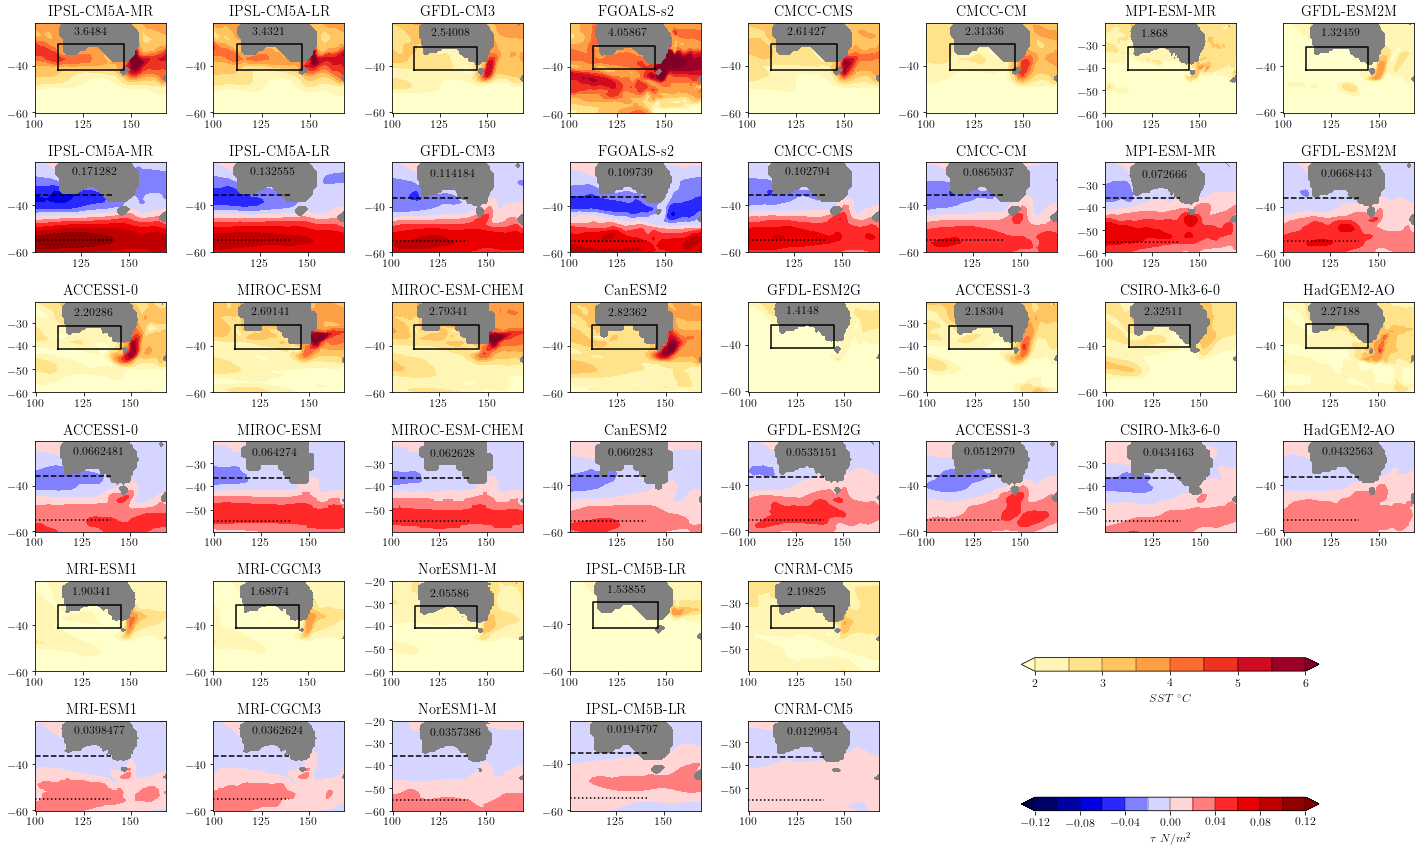

In [47]:
matplotlib.rcParams.update({'font.size': 12}) 
row = 6
col = 8
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.close('all')
fig = plt.figure() 
fig.set_size_inches(20, 12)

count = -1
p = 0
for dum, idx in enumerate(SAM_index_sorted):
    print(plot_list[idx])
    t = plot_list[idx]
    count += 1
    if count is col:
        count = 0
        p += 1
    
    ax = plt.subplot2grid((row, col), (p*2, count))
    cmap = plt.get_cmap('YlOrRd')
    step = 0.5
    contf_lvls = np.arange(2,6+1e-08,step)              
    ax.set_facecolor('grey')
    lat_N = -20
    lat_S = -60
    lon_W = 100
    lon_E = 170
    lat_N_idx = find_nearest_index(thetao_lat[t], lat_N)
    lat_S_idx = find_nearest_index(thetao_lat[t], lat_S)
    lon_W_idx = find_nearest_index(thetao_lon[t], lon_W)
    lon_E_idx = find_nearest_index(thetao_lon[t], lon_E)
    contf = plt.contourf(
        thetao_lon[t][lon_W_idx:lon_E_idx],
        thetao_lat[t][lat_S_idx:lat_N_idx],
        thetao_anom[t][lat_S_idx:lat_N_idx,lon_W_idx:lon_E_idx], contf_lvls, cmap=cmap, extend='both')
    lat_warmN_idx = find_nearest_index(thetao_lat[t], lat_warmN)
    lat_warmS_idx = find_nearest_index(thetao_lat[t], lat_warmS)
    lon_warmW_idx = find_nearest_index(thetao_lon[t], lon_warmW)
    lon_warmE_idx = find_nearest_index(thetao_lon[t], lon_warmE)
    plt.plot(
        [thetao_lon[t][lon_warmW_idx],
         thetao_lon[t][lon_warmE_idx],
         thetao_lon[t][lon_warmE_idx],
         thetao_lon[t][lon_warmW_idx],
         thetao_lon[t][lon_warmW_idx]],
        [thetao_lat[t][lat_warmS_idx],
         thetao_lat[t][lat_warmS_idx],
         thetao_lat[t][lat_warmN_idx],
         thetao_lat[t][lat_warmN_idx],
         thetao_lat[t][lat_warmS_idx]], '-k')
    ax.text(120, -27, str(warm_pool[t]))
    ax.set_title(t)
    if dum == len(SAM_index_sorted)-1:
        ax = plt.subplot2grid((row, col), (p*2, count+1), colspan=3)
        cbar = plt.colorbar(contf, orientation='horizontal', drawedges=True)
        cbar.set_label(r'$SST$ $^{\circ}C$') 
        cbar.set_ticks(contf_lvls[np.arange(0,np.size(contf_lvls),2)])
        plt.axis('off')
        
    ax = plt.subplot2grid((row, col), (1+p*2, count))
    cmap = plt.get_cmap('seismic')
    step = 0.02
    contf_lvls = np.arange(-0.12,0.12+1e-08,step)              
    ax.set_facecolor('grey')
    lat_N_idx = find_nearest_index(tauuo_lat[t], lat_N)
    lat_S_idx = find_nearest_index(tauuo_lat[t], lat_S)
    lon_W_idx = find_nearest_index(tauuo_lon[t], lon_W)
    lon_E_idx = find_nearest_index(tauuo_lon[t], lon_E)
    contf = plt.contourf(
        tauuo_lon[t][lon_W_idx:lon_E_idx],
        tauuo_lat[t][lat_S_idx:lat_N_idx],
        tauuo_anom[t][lat_S_idx:lat_N_idx,lon_W_idx:lon_E_idx], contf_lvls, cmap=cmap, extend='both')
    lat_neg_idx = find_nearest_index(tauuo_lat[t], lat_neg)
    lat_pos_idx = find_nearest_index(tauuo_lat[t], lat_pos)
    lon_negW_idx = find_nearest_index(tauuo_lon[t], lon_negW)
    lon_negE_idx = find_nearest_index(tauuo_lon[t], lon_negE)
    plt.plot(
        [tauuo_lon[t][lon_negW_idx],tauuo_lon[t][lon_negE_idx]],
        [tauuo_lat[t][lat_neg_idx],tauuo_lat[t][lat_neg_idx]], '--k')
    plt.plot(
        [tauuo_lon[t][lon_negW_idx],tauuo_lon[t][lon_negE_idx]],
        [tauuo_lat[t][lat_pos_idx],tauuo_lat[t][lat_pos_idx]], ':k')
    ax.text(120, -27, str(SAM_index[idx]))
    ax.set_title(t)
    if dum == len(SAM_index_sorted)-1:
        ax = plt.subplot2grid((row, col), (1+p*2, count+1), colspan=3)
        cbar = plt.colorbar(contf, orientation='horizontal', drawedges=True)
        cbar.set_label(r'$\tau$ $N/m^{2}$') 
        cbar.set_ticks(contf_lvls[np.arange(0,np.size(contf_lvls),2)])
        plt.axis('off')
    
plt.tight_layout()

output_ls = os.listdir(figures_path)
if not script_name:
    script_name = 'test'
elif script_name not in output_ls:
    os.mkdir(figures_path + '/' + script_name)
plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
            + '_fig1_' + '.png', bbox_inches='tight', dpi=200)
    
    